<a href="https://colab.research.google.com/github/nidhaloff/Regression_analysis_pytorch/blob/master/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import keras
import logging
from keras import backend as K
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import r2_score
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

%matplotlib inline

# run keras model on google GPU
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
K.tensorflow_backend._get_available_gpus()

logging.basicConfig(
    format='%(asctime)s - %(levelname)s - %(message)s',
    datefmt='%m/%d/%Y %I:%M:%S %p',
    level=logging.DEBUG,
    filename='log.txt'
)

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7



In [20]:
dataset = make_regression(n_samples=1000, n_features=10, noise=10, random_state=42)
X, y = dataset
X.shape, y.shape

((1000, 10), (1000,))

In [21]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [22]:
pip install skorch

(1000, 10) (1000, 1)
torch.Size([800, 10]) torch.Size([800, 1])
Epoch: 0 => (criterion= mse, optimizer=adagrad)=> average training loss= 17823.113055889422 average test losses= 17980.65087890625 and accuracy= -0.02211252872604688
Epoch: 1 => (criterion= mse, optimizer=adagrad)=> average training loss= 17619.73429987981 average test losses= 17971.27978515625 and accuracy= -0.021576779205527905
Epoch: 2 => (criterion= mse, optimizer=adagrad)=> average training loss= 17555.039287860578 average test losses= 17963.253580729168 and accuracy= -0.02111747516481614
Epoch: 3 => (criterion= mse, optimizer=adagrad)=> average training loss= 17593.789006159855 average test losses= 17956.022827148438 and accuracy= -0.02070385175920978
Epoch: 4 => (criterion= mse, optimizer=adagrad)=> average training loss= 17539.1677734375 average test losses= 17949.42666015625 and accuracy= -0.02032671905201408
Epoch: 5 => (criterion= mse, optimizer=adagrad)=> average training loss= 17513.362329727563 average test l

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type Regressor. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type Regressor. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type Regressor. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type Regressor. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/pytho

Epoch: 9 => (criterion= mse, optimizer=adagrad)=> average training loss= 17500.934021935096 average test losses= 17921.919848632813 and accuracy= -0.018753227141680973
Epoch: 0 => (criterion= mse, optimizer=adam)=> average training loss= 17753.8876953125 average test losses= 17889.38671875 and accuracy= -0.017113051108869043
Epoch: 1 => (criterion= mse, optimizer=adam)=> average training loss= 17573.689903846152 average test losses= 17848.665771484375 and accuracy= -0.014752966673702642
Epoch: 2 => (criterion= mse, optimizer=adam)=> average training loss= 17518.20625500801 average test losses= 17803.70361328125 and accuracy= -0.01215630747673275
Epoch: 3 => (criterion= mse, optimizer=adam)=> average training loss= 17493.262413611777 average test losses= 17753.27655029297 and accuracy= -0.009240334742156985
Epoch: 4 => (criterion= mse, optimizer=adam)=> average training loss= 17355.70782752404 average test losses= 17695.608984375 and accuracy= -0.00590658803153013
Epoch: 5 => (criterion

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type Regressor. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type Regressor. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type Regressor. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type Regressor. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/pytho

Epoch: 8 => (criterion= mse, optimizer=adam)=> average training loss= 17044.398929954594 average test losses= 17375.291314019098 and accuracy= 0.012609750364786489
Epoch: 9 => (criterion= mse, optimizer=adam)=> average training loss= 16948.586959134616 average test losses= 17268.768408203126 and accuracy= 0.01876700847692556
Epoch: 0 => (criterion= mse, optimizer=adadelta)=> average training loss= 17649.0703125 average test losses= 17998.80908203125 and accuracy= -0.023159237206107852
Epoch: 1 => (criterion= mse, optimizer=adadelta)=> average training loss= 17841.77197265625 average test losses= 17998.67529296875 and accuracy= -0.023151551555239056
Epoch: 2 => (criterion= mse, optimizer=adadelta)=> average training loss= 17677.225435697117 average test losses= 17998.541829427082 and accuracy= -0.023143881396638588
Epoch: 3 => (criterion= mse, optimizer=adadelta)=> average training loss= 17653.25157752404 average test losses= 17998.405883789062 and accuracy= -0.023136067812764664
Epoch:

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type Regressor. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type Regressor. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type Regressor. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type Regressor. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/pytho

Epoch: 7 => (criterion= mse, optimizer=rmsprop)=> average training loss= 15472.360529972957 average test losses= 15841.441650390625 and accuracy= 0.10139790498913565
Epoch: 8 => (criterion= mse, optimizer=rmsprop)=> average training loss= 15224.22424629407 average test losses= 15586.886149088541 and accuracy= 0.11610266675672988
Epoch: 9 => (criterion= mse, optimizer=rmsprop)=> average training loss= 14957.361771334135 average test losses= 15331.860888671876 and accuracy= 0.1308278380030759
Epoch: 0 => (criterion= mse, optimizer=sgd)=> average training loss= 12244.184974083533 average test losses= 1088.6996765136719 and accuracy= 0.9383814134301377
Epoch: 1 => (criterion= mse, optimizer=sgd)=> average training loss= 6236.550745743972 average test losses= 591.7919545173645 and accuracy= 0.9664049605481533
Epoch: 2 => (criterion= mse, optimizer=sgd)=> average training loss= 4190.117400144919 average test losses= 426.0372714996338 and accuracy= 0.9757487094096842
Epoch: 3 => (criterion= m

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type Regressor. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type Regressor. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type Regressor. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type Regressor. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/pytho

Epoch: 8 => (criterion= mse, optimizer=sgd)=> average training loss= 1461.5193383306519 average test losses= 200.33871163262262 and accuracy= 0.988474660688244
Epoch: 9 => (criterion= mse, optimizer=sgd)=> average training loss= 1325.1495662689208 average test losses= 189.10865621566774 and accuracy= 0.9891097039568975
Epoch: 0 => (criterion= mse, optimizer=rprop)=> average training loss= 17598.65782752404 average test losses= 17703.293701171875 and accuracy= -0.006347657957213759
Epoch: 1 => (criterion= mse, optimizer=rprop)=> average training loss= 16526.270226111777 average test losses= 13835.704223632812 and accuracy= 0.21433131571283967
Epoch: 2 => (criterion= mse, optimizer=rprop)=> average training loss= 11805.242569752229 average test losses= 9321.263019561768 and accuracy= 0.4706883034312525
Epoch: 3 => (criterion= mse, optimizer=rprop)=> average training loss= 8911.808094611535 average test losses= 7040.601294517517 and accuracy= 0.600209194294358
Epoch: 4 => (criterion= mse,

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type Regressor. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type Regressor. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


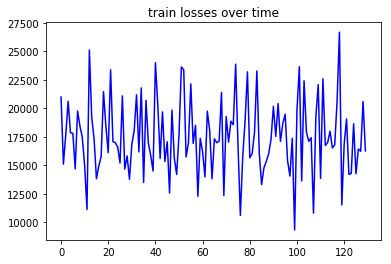

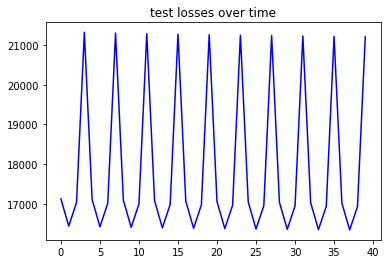

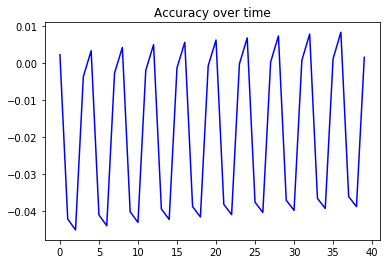

final train loss value =  16275.1015625
final test loss value =  21212.26953125
final accuracy of the model =>  0.0016347310609474697
plotting the results of: mse adam ... 


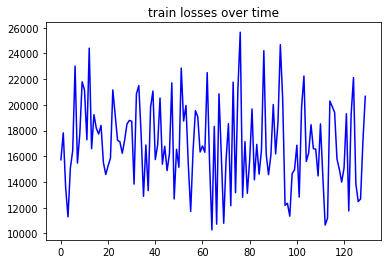

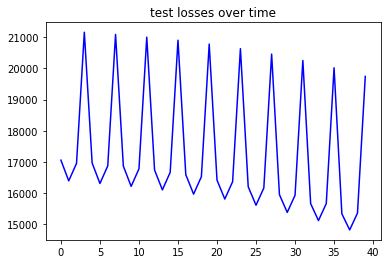

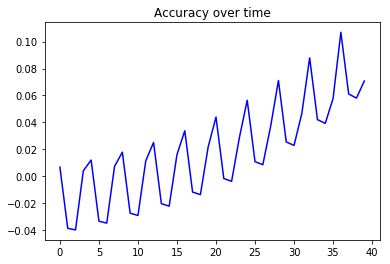

final train loss value =  20667.8125
final test loss value =  19744.908203125
final accuracy of the model =>  0.0706967553768919
plotting the results of: mse adadelta ... 


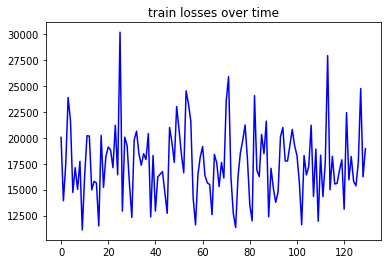

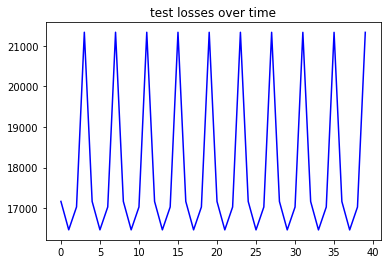

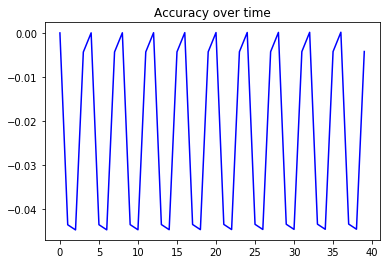

final train loss value =  18957.25390625
final test loss value =  21334.73828125
final accuracy of the model =>  -0.0041293348507873695
plotting the results of: mse adamax ... 


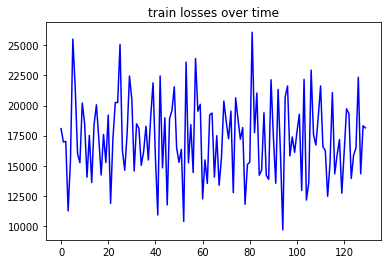

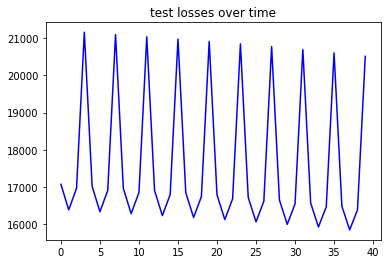

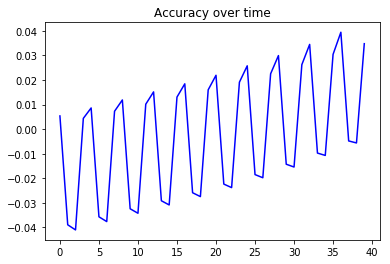

final train loss value =  18144.4765625
final test loss value =  20508.328125
final accuracy of the model =>  0.034766092061889964
plotting the results of: mse adaW ... 


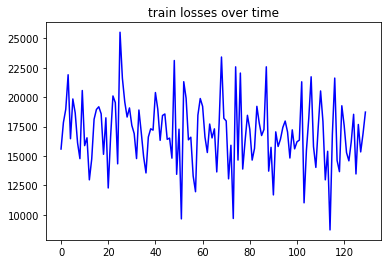

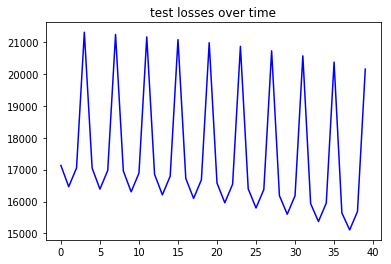

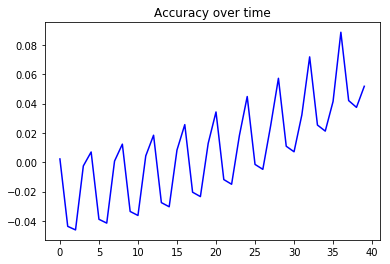

final train loss value =  18732.42578125
final test loss value =  20145.634765625
final accuracy of the model =>  0.05183636590210261
plotting the results of: mse rmsprop ... 


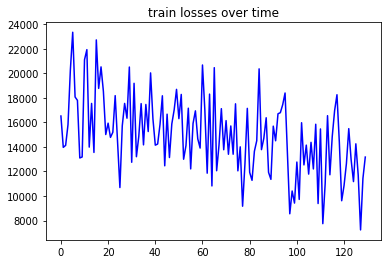

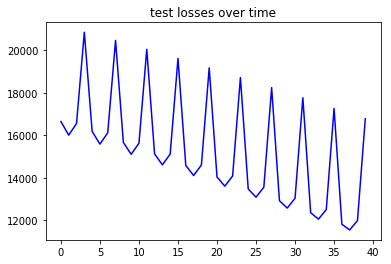

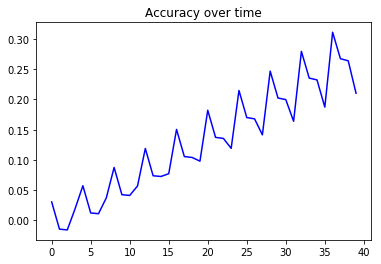

final train loss value =  13178.013671875
final test loss value =  16775.943359375
final accuracy of the model =>  0.2104324197702957
plotting the results of: mse sgd ... 


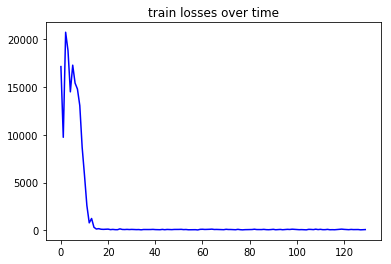

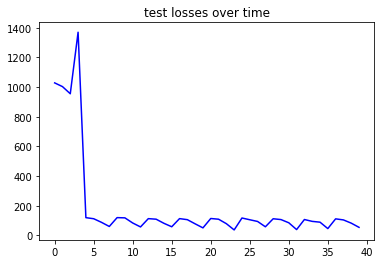

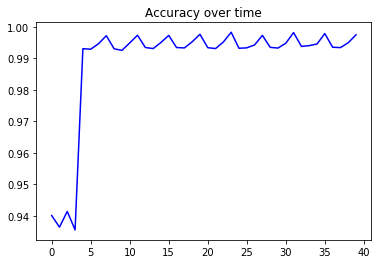

final train loss value =  92.73809051513672
final test loss value =  54.10518264770508
final accuracy of the model =>  0.9974535144702328
plotting the results of: mse rprop ... 


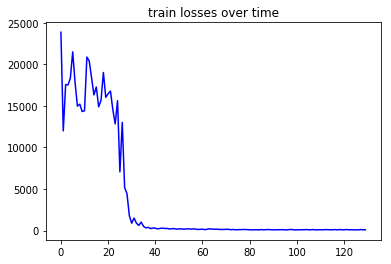

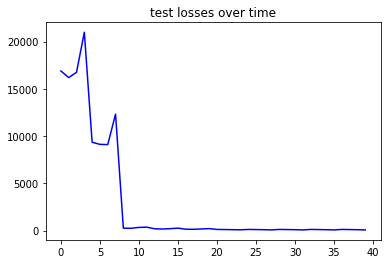

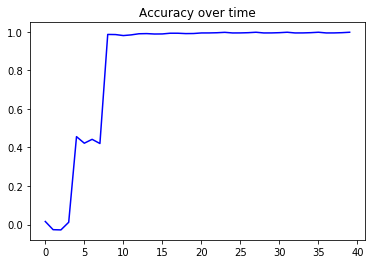

final train loss value =  91.389892578125
final test loss value =  63.907745361328125
final accuracy of the model =>  0.9969921524212667
plotting the results of: mse Asgd ... 


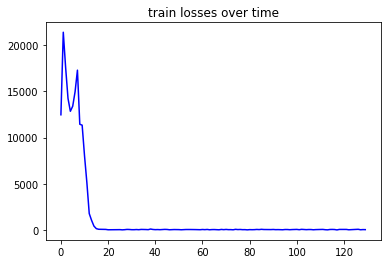

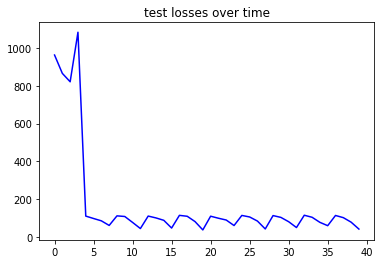

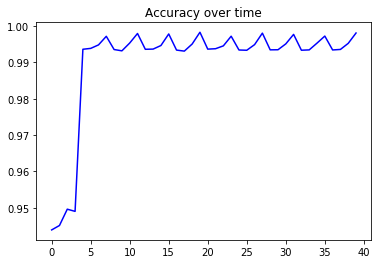

final train loss value =  90.18162536621094
final test loss value =  41.722232818603516
final accuracy of the model =>  0.9980363238721531


In [23]:
# implementation only using pytorch

y = y.reshape(-1, 1)
print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
X_train_torch = torch.from_numpy(X_train.astype(np.float32))
y_train_torch = torch.from_numpy(y_train.astype(np.float32))
X_test_torch = torch.from_numpy(X_test.astype(np.float32))
y_test_torch = torch.from_numpy(y_test.astype(np.float32))
print(X_train_torch.shape, y_train_torch.shape)


trainset = TensorDataset(X_train_torch, y_train_torch)
testset = TensorDataset(X_test_torch, y_test_torch)

train_loader = DataLoader(trainset, batch_size=64, shuffle=True)
test_loader = DataLoader(testset, batch_size=64, shuffle=False)


class Regressor(nn.Module):
    def __init__(self, n_features, n_out):
        super().__init__()
        self.fc1 = nn.Linear(n_features, 100)
        self.fc2 = nn.Linear(100, n_out)
#         self.fc3 = nn.Linear(600, 300)
#         self.fc4 = nn.Linear(300, n_out)
        
    def forward(self, x):
        out = self.fc1(x)
#         out = F.tanh(self.fc2(out))
#         out = F.sigmoid(self.fc3(out))
        out = self.fc2(out)
        return out
    


# criterion = nn.MSELoss()
# optimizer = optim.SGD(model.parameters(), lr=1e-4, momentum=0.9)
criterions = {"mse": nn.MSELoss(), 
              #"cross_entropy": nn.CrossEntropyLoss(), 
              #"bce": nn.BCELoss(), 
              #"ctc": nn.CTCLoss(), 
              #"cos_embed": nn.CosineEmbeddingLoss()
             }

optims = {
           "adagrad": optim.Adagrad,
            
           "adam": optim.Adam, 
           "adadelta": optim.Adadelta, 
           "adamax": optim.Adamax, 
          "adaW": optim.AdamW, 
          "rmsprop": optim.RMSprop,
          "sgd": optim.SGD,
           "rprop": optim.Rprop,
            "Asgd": optim.ASGD,
          
         }


def training_func(model, criterion, optimizer):
    def train_step(sample, target):
        model.train()
        optimizer.zero_grad()
        out = model(sample)
        loss = criterion(out, target)
        loss.backward()
        optimizer.step()
        return loss.item()
    return train_step

res_dic = {}

def fit(epochs=10):
    best_scores = {"min_error": None, "best_acc": None, "optimizer": None, "loss_func": None, "updated": 0}   # dictionary to hold the best values after calculating and comparing the models
    for key_c, criterion in criterions.items():
        for key_o, opt in optims.items():
            model = Regressor(X.shape[1], 1)    # create a net
            optimizer = opt(model.parameters(), lr=1e-3)
            train_losses, test_losses, accuracy_list = ([] for _ in range(3))
            train = training_func(model=model, criterion=criterion, optimizer=optimizer)
            for e in range(epochs):
                for x, y in train_loader:
                    loss_val = train(x, y)
                    train_losses.append(loss_val)

                else:
                    with torch.no_grad():
                        model.eval()
                        for x_test, y_test in test_loader:
                            pred = model(x_test)
                            loss = criterion(pred, y_test)
                            test_losses.append(loss.item())
                            accuracy = r2_score(y_test.numpy(), pred.numpy())
                            accuracy_list.append(accuracy)
                
                avg_train_loss = sum(train_losses)/ len(train_losses)
                avg_test_loss = sum(test_losses)/ len(test_losses)
                avg_accuracy = sum(accuracy_list)/ len(accuracy_list)
                
                print(f"Epoch: {e} => (criterion= {key_c}, optimizer={key_o})=> average training loss= {avg_train_loss} average test losses= {avg_test_loss} and accuracy= {avg_accuracy}")

#             return train_losses, test_losses, accuracy_list
                dic = {"train_losses": train_losses, "test_losses": test_losses, "accs": accuracy_list}
                res_dic[key_c + ' '+ key_o] = dic
        
                if None in best_scores.values():
                    best_scores["min_error"] = avg_test_loss
                    best_scores["best_acc"] = avg_accuracy
                    best_scores["loss_func"] = key_c
                    best_scores["optimizer"] = key_o
                    best_scores["updated"] = 0
                    
                else:
                    
                    if best_scores["min_error"] > avg_test_loss and best_scores["best_acc"] < avg_accuracy:
                    
                        best_scores["min_error"] = avg_test_loss
                        best_scores["best_acc"] = avg_accuracy
                        best_scores["updated"] += 1
                        best_scores["loss_func"] = key_c
                        best_scores["optimizer"] = key_o
                        torch.save(model, 'model.pt')
    
    return best_scores    

def plot_results(train_losses, test_losses, accs):
    plt.plot(train_losses, color="b")
    plt.title("train losses over time")
    plt.show()
    plt.plot(test_losses, color= "b")
    plt.title("test losses over time")
    plt.show()
    
    plt.plot(accs, color= "b")
    plt.title("Accuracy over time")
    plt.show()
    print("="*100)

def plot_all_res(dic_results):
    for key in dic_results.keys():
        print("plotting the results of: {} ... ".format(key))
        snapshot = dic_results[key]   # get a snapshot from a all the results in the res dic
        plot_results(snapshot['train_losses'], snapshot['test_losses'], snapshot['accs'])
        
        print("final train loss value = ", snapshot['train_losses'][-1])
        print("final test loss value = ", snapshot['test_losses'][-1])
        print("final accuracy of the model => ", snapshot['accs'][-1])

best_scores = fit(10)



print("best_scores found => ", best_scores)
# plot_results(train_losses, test_losses, accs)
plot_all_res(res_dic)


In [24]:
print(X_test_torch.shape)
model = torch.load('model.pt')
with torch.no_grad():
    net_preds = model(X_test_torch)
    print(net_preds.shape)
    score = r2_score(y_test_torch.detach().numpy(), net_preds)
    print(score)
#     plt.scatter(X_test_torch.detach().numpy(), y_test_torch.detach().numpy(), c="r", marker="o")
#     plt.plot(X_test_torch.detach().numpy(), net_preds, color="g")

torch.Size([200, 10])
torch.Size([200, 1])
0.9942867527893448
